In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/mac/Developer/Data Science Project/data/StudentsPerformance.csv')

In [3]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [55]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [56]:
df.rename(columns={'race/ethnicity':'ethnicity','parental level of education':'edu_level','test preparation course':'course'},inplace=True)

In [57]:
df['avg_score'] = round((df['math score'] + df['reading score'] + df['writing score']) / 3,2)

In [58]:
df.drop(columns=['reading score','writing score','math score'],inplace=True)


In [59]:
print(df.shape)
print(df.head())

(999, 6)
   gender ethnicity           edu_level         lunch     course  avg_score
0  female   group B   bachelor's degree      standard       none      72.67
1  female   group C        some college      standard  completed      82.33
2  female   group B     master's degree      standard       none      92.67
3    male   group A  associate's degree  free/reduced       none      49.33
4    male   group C        some college      standard       none      76.33


In [60]:
df.isna().mean()

gender       0.0
ethnicity    0.0
edu_level    0.0
lunch        0.0
course       0.0
avg_score    0.0
dtype: float64

In [61]:
df.drop_duplicates(inplace=True)

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_score,983.0,67.728311,14.340307,9.0,58.165,68.33,77.835,100.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983 entries, 0 to 998
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     983 non-null    object 
 1   ethnicity  983 non-null    object 
 2   edu_level  983 non-null    object 
 3   lunch      983 non-null    object 
 4   course     983 non-null    object 
 5   avg_score  983 non-null    float64
dtypes: float64(1), object(5)
memory usage: 53.8+ KB


In [64]:
cat_columns = df.select_dtypes(include='object')
for i in cat_columns.columns:
    print(f"unique value count number:->{cat_columns[i].nunique()}")
    print(f"unique value :->{cat_columns[i].unique()}")
    print('-'*150)

unique value count number:->2
unique value :->['female' 'male']
------------------------------------------------------------------------------------------------------------------------------------------------------
unique value count number:->5
unique value :->['group B' 'group C' 'group A' 'group D' 'group E']
------------------------------------------------------------------------------------------------------------------------------------------------------
unique value count number:->6
unique value :->["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
------------------------------------------------------------------------------------------------------------------------------------------------------
unique value count number:->2
unique value :->['standard' 'free/reduced']
------------------------------------------------------------------------------------------------------------------------------------------------------
uniq

In [65]:
df.head()

,gender,ethnicity,edu_level,lunch,course,avg_score
0,female,group B,bachelor's degree,standard,none,72.67
1,female,group C,some college,standard,completed,82.33
2,female,group B,master's degree,standard,none,92.67
3,male,group A,associate's degree,free/reduced,none,49.33
4,male,group C,some college,standard,none,76.33


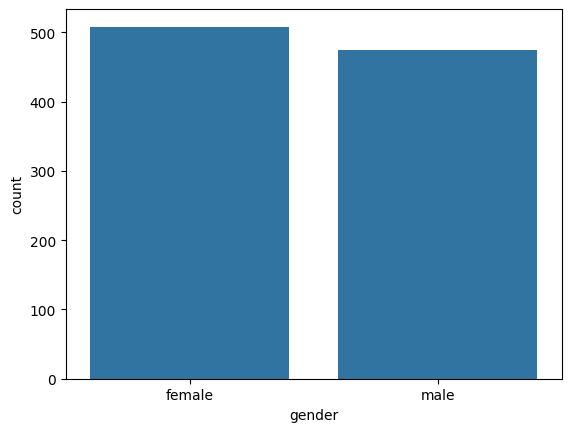

In [66]:
sns.countplot(x=df['gender'])
plt.show()

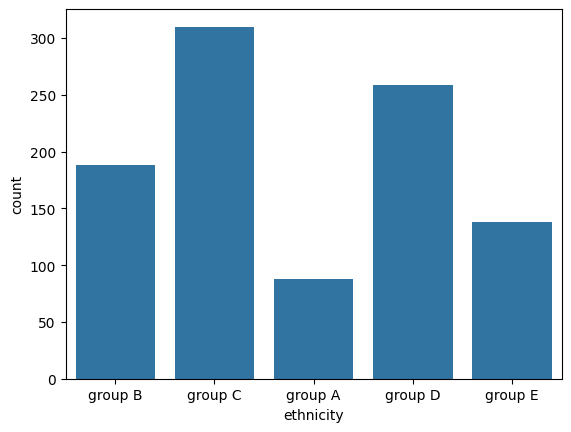

In [67]:
sns.countplot(x=df['ethnicity'])
plt.show()

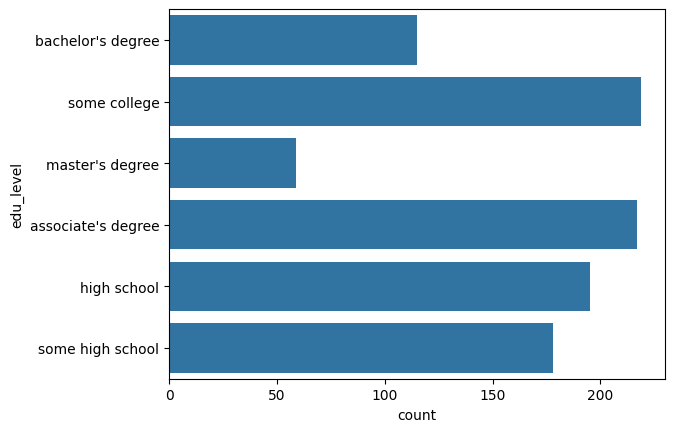

In [68]:
sns.countplot(df['edu_level'])
plt.show()

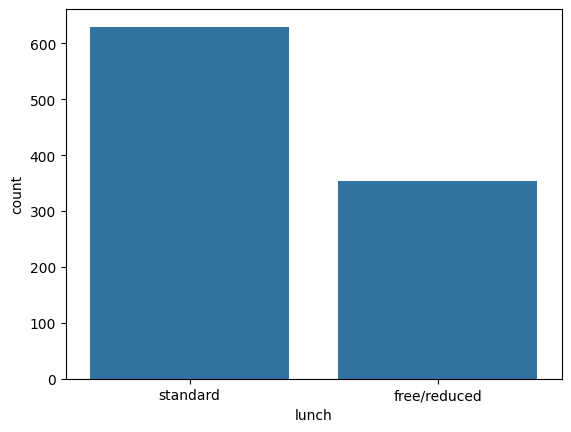

In [69]:
sns.countplot(x=df['lunch'])
plt.show()

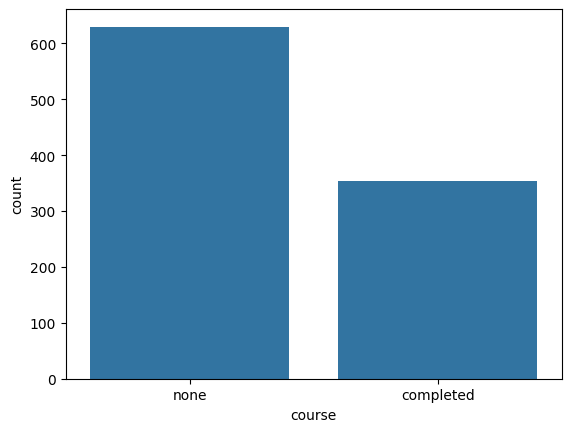

In [71]:
sns.countplot(x=df['course'])
plt.show()

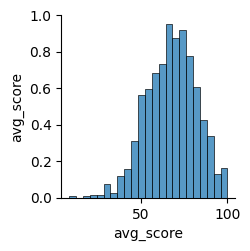

In [72]:
sns.pairplot(data=df)
plt.show()

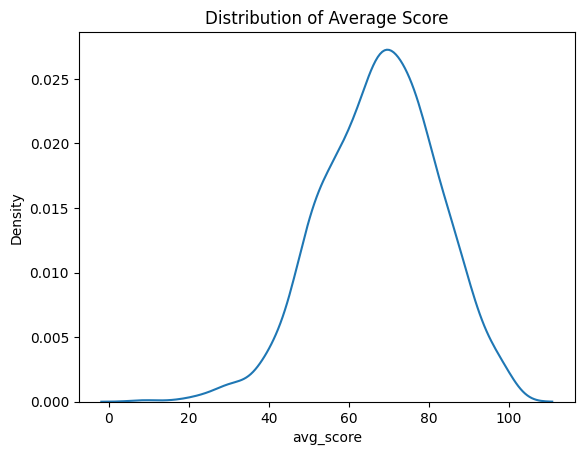

In [73]:
sns.distplot(df['avg_score'],hist=False)
plt.title('Distribution of Average Score')
plt.show()